In [485]:
# Importar librerías Generales
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos.

In [486]:
# Lectura de datos
df = pd.read_csv('movies.csv')

In [487]:
# pre procesamiento de datos en el dataframe
df['id'] = df['id'].astype(str)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['genres'] = df['genres'].str.split('|')
df['homePage'] = df['homePage'].astype(str)
df['productionCompany'] = df['productionCompany'].str.split('|')
df['productionCompanyCountry'] = df['productionCompanyCountry'].str.split('|')
df['productionCountry'] = df['productionCountry'].str.split('|')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['video'] = df['video'].astype(bool)
df['director'] = df['director'].str.split('|')
df['actors'] = df['actors'].str.split('|')

#df['actorsPopularity'] = df['actorsPopularity'].str.split('|')
#print(df['actorsPopularity'])
#df['actorsPopularity'] = df['actorsPopularity'].apply(lambda x: [float(val) for val in x] if isinstance(x, list) else x)
#print(df['actorsPopularity'])

# Dividir las cadenas en la columna 'actorsPopularity' por el carácter '|'
df['actorsPopularity'] = df['actorsPopularity'].str.split('|')

# Convertir los elementos de las listas en actorsPopularity a floats
df['actorsPopularity'] = df['actorsPopularity'].apply(
    lambda x: [float(val) if val.replace('.', '', 1).isdigit() else 0 for val in x] if isinstance(x, list) else x
)



df['actorsCharacter'] = df['actorsCharacter'].str.split('|')
df['originalTitle'] = df['originalTitle'].astype(str)
df['title'] = df['title'].astype(str)
df['originalLanguage'] = df['originalLanguage'].astype(str)
df['popularity'] = pd.to_numeric(df['budget'], errors='coerce')
df['releaseDate'] = df['releaseDate'].astype(str)
df['voteAvg'] = pd.to_numeric(df['voteAvg'], errors='coerce')
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')
df['genresAmount'] = pd.to_numeric(df['genresAmount'], errors='coerce')
df['productionCoAmount'] = pd.to_numeric(df['productionCoAmount'], errors='coerce')
df['productionCountriesAmount'] = pd.to_numeric(df['productionCountriesAmount'], errors='coerce')
df['actorsAmount'] = pd.to_numeric(df['actorsAmount'], errors='coerce')
df['castWomenAmount'] = pd.to_numeric(df['castWomenAmount'], errors='coerce')
df['castMenAmount'] = pd.to_numeric(df['castMenAmount'], errors='coerce')

*Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)*

In [488]:
def asign(x):
    switch = {
        1: 'cualitativa nominal',
        2: 'cualitativa ordinal',
        3: 'cuantitativa continua',
        4: 'cuantitativa discreta'
    }
    return switch.get(x, 'Unknown')

tipo_var = [
    3, 1, 1, 1, 1, 3, 3, 4, 2, 1, 3, 1, 1, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4
]



In [489]:
# hay columnas que no aportan valor al analisis. Se eliminan
df = df.drop(['id', 'homePage', 'originalTitle', 'originalLanguage'], axis=1)

## (5 puntos) Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)

In [490]:
table = pd.DataFrame({
    'index of the column': [i for i, _ in enumerate(df.columns)],
    'type of the first non-null element of the column': df.apply(lambda x: type(x.dropna().iloc[0]) if x.dropna().size else None),
    'number of NaN values in the column': df.isna().sum()
})

# add a COLUMN to the dataframe table and assign the type of variable using the function asign
table['type of variable'] = [asign(x) for x in tipo_var]

# Print the table
table.head(100)

,index of the column,type of the first non-null element of the column,number of NaN values in the column,type of variable
budget,0,<class 'numpy.float64'>,1,cuantitativa continua
genres,1,<class 'list'>,53,cualitativa nominal
productionCompany,2,<class 'list'>,457,cualitativa nominal
productionCompanyCountry,3,<class 'list'>,1280,cualitativa nominal
productionCountry,4,<class 'list'>,233,cualitativa nominal
revenue,5,<class 'numpy.int64'>,0,cuantitativa continua
runtime,6,<class 'numpy.int64'>,0,cuantitativa continua
video,7,<class 'numpy.bool_'>,0,cuantitativa discreta
director,8,<class 'list'>,74,cualitativa ordinal
actors,9,<class 'list'>,80,cualitativa nominal


## Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados. 

In [491]:
# comenzaremos por eliminar las filas con datos incorrectos. 
def get_rows_with_nan(df, column_name):
    return df[df[column_name].isna()]

def delete_row(df, index):
    return df.drop(index)

def get_rows_with_str_list(df, column_name):
    return df[df[column_name].apply(lambda x: isinstance(x, list) and any(isinstance(i, str) for i in x))]


In [492]:
# Eliminamos las filas con datos incorrectos

# para budget
rows = get_rows_with_nan(df, 'budget')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna budget. ")


# para revenue
rows = get_rows_with_nan(df, 'revenue')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna revenue. ")

# para runtime
rows = get_rows_with_nan(df, 'runtime')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna runtime. ")

# para video
rows = get_rows_with_nan(df, 'video')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna video. ")

# para actorsPopularity
rows = get_rows_with_str_list(df, 'actorsPopularity')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna actorsPopularity. ")

# para popularity
rows = get_rows_with_nan(df, 'popularity')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna popularity. ")

# para voteAvg
rows = get_rows_with_nan(df, 'voteAvg')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna voteAvg. ")

# para voteCount
rows = get_rows_with_nan(df, 'voteCount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna voteCount. ")

# para genresAmount
rows = get_rows_with_nan(df, 'genresAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna genresAmount. ")

# para productionCoAmount
rows = get_rows_with_nan(df, 'productionCoAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna productionCoAmount. ")

# para productionCountriesAmount
rows = get_rows_with_nan(df, 'productionCountriesAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna productionCountriesAmount. ")

# para actorsAmount
rows = get_rows_with_nan(df, 'actorsAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna actorsAmount. ")

# para castWomenAmount
rows = get_rows_with_nan(df, 'castWomenAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna castWomenAmount. ")

# para castMenAmount
rows = get_rows_with_nan(df, 'castMenAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna castMenAmount. ")

1  fueron afectadas en relacion a la columna budget. 
0  fueron afectadas en relacion a la columna revenue. 
0  fueron afectadas en relacion a la columna runtime. 
0  fueron afectadas en relacion a la columna video. 
0  fueron afectadas en relacion a la columna actorsPopularity. 
0  fueron afectadas en relacion a la columna popularity. 
1  fueron afectadas en relacion a la columna voteAvg. 
0  fueron afectadas en relacion a la columna voteCount. 
0  fueron afectadas en relacion a la columna genresAmount. 
0  fueron afectadas en relacion a la columna productionCoAmount. 
0  fueron afectadas en relacion a la columna productionCountriesAmount. 
0  fueron afectadas en relacion a la columna actorsAmount. 


,budget,genres,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
4652,0.0,NaN,NaN,NaN,NaN,0,90,True,[Harold Trompetero],"[Antonio Sanint, Carolina Gómez, María Margari...",...,0.0,2010-12-25,6.5,24.0,3.0,1.0,0.0,88278.0,NaN,NaN
4940,0.0,NaN,NaN,NaN,NaN,0,80,True,[Esteban Echeverría],NaN,...,0.0,2012-08-30,4.1,5.0,0.0,0.0,0.0,138550.0,NaN,NaN
5249,0.0,NaN,NaN,NaN,NaN,0,61,True,[Amir Assadi],"[Denisa Heaven, Sweet Cat]",...,0.0,2012-01-08,8.1,19.0,2.0,2.0,0.0,204450.0,NaN,NaN
5672,0.0,NaN,NaN,NaN,NaN,0,0,True,[Christopher Hool],"[Sandra Echeverría, Osvaldo de León, Héctor Ji...",...,0.0,2014-05-23,6.0,18.0,7.0,4.0,3.0,267802.0,NaN,NaN
5831,0.0,NaN,NaN,NaN,NaN,0,0,True,NaN,NaN,...,0.0,2009-12-18,8.5,2.0,0.0,0.0,0.0,287004.0,NaN,NaN
6626,0.0,NaN,NaN,NaN,NaN,0,13,True,[Jeremy David White],"[Davis Desmond, Lili Reinhart, Noland Ammon, V...",...,0.0,2013-02-20,6.5,2.0,8.0,2.0,2.0,374338.0,NaN,NaN
6746,0.0,NaN,NaN,NaN,NaN,0,129,True,NaN,"[Jason Ritter, Kristen Schaal]",...,0.0,2013-10-15,9.1,13.0,2.0,1.0,0.0,385281.0,NaN,NaN
6751,0.0,NaN,NaN,NaN,NaN,0,12,True,NaN,NaN,...,0.0,2016-02-24,9.8,3.0,0.0,0.0,0.0,385522.0,NaN,NaN
6797,0.0,NaN,NaN,NaN,NaN,0,83,True,[Joo Sung Woo],"[Je Dong-hwa, Park Ha-yan, Joo Ye-bin, Hee Jeo...",...,0.0,2016-03-07,4.0,3.0,5.0,3.0,2.0,391907.0,NaN,NaN
7128,0.0,NaN,NaN,NaN,NaN,0,0,True,NaN,NaN,...,0.0,2016-09-07,4.0,4.0,0.0,0.0,0.0,420623.0,NaN,NaN


In [493]:
def visualizar_distribucion_normal(var):
    # Crear el gráfico Q-Q
    sm.qqplot(var, line='s')
    plt.title(f'Q-Q Plot de {var.name}')

    # Agregar la curva de distribución normal
    mu, std = var.mean(), var.std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.show()


def visualizar_distribucion_normal_lista(lista):
    # Filtrar elementos que no son listas
    lista_no_vacia = [x for x in lista if isinstance(x, list) and len(x) > 0]

    # Verificar si hay listas válidas
    if not lista_no_vacia:
        print("No hay datos válidos para visualizar.")
        return

    # Convertir a un tipo de dato numérico antes de concatenar
    concatenated_data = np.concatenate([np.asarray(x, dtype=np.float64) for x in lista_no_vacia])

    # Crear el gráfico Q-Q
    sm.qqplot(concatenated_data, line='s')
    plt.title(f'Q-Q Plot de {lista.name}')

    # Agregar la curva de distribución normal
    mu, std = np.mean(concatenated_data), np.std(concatenated_data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.show()

#### Tabla de frecuencía de generos

In [494]:
# Aplanar las listas en la columna 'genres'
df_genres_expanded = df['genres'].explode().dropna()

# Dividir cada elemento por la coma y agregar a una nueva lista
lista_final_generos = [genre.strip() for sublist in df_genres_expanded.str.split(',') for genre in sublist]

# Crear la tabla de frecuencias como DataFrame
tabla_frecuencias_generos = pd.Series(lista_final_generos).value_counts().reset_index()
tabla_frecuencias_generos.columns = ['Género', 'Frecuencia']

# Imprimir las primeras filas de la tabla de frecuencias
tabla_frecuencias_generos.head(20)

,Género,Frecuencia
0,Drama,3789
1,Comedy,3017
2,Action,2632
3,Thriller,2565
4,Adventure,1768
5,Horror,1512
6,Animation,1460
7,Romance,1427
8,Family,1406
9,Fantasy,1283


In [495]:
pd.crosstab(index=df['releaseDate'], columns='count').sort_values(by='count', ascending=False)

col_0,count
releaseDate,
2021-02-12,15
2021-10-08,15
2021-10-01,14
2021-11-12,12
2021-07-23,11
...,...
2004-02-13,1
2004-02-11,1
2004-02-09,1


In [496]:
pd.crosstab(index=df['title'], columns='count').sort_values(by='count', ascending=False)


col_0,count
title,
Pinocchio,4
Cinderella,4
Porno,3
The Courier,3
Beauty and the Beast,3
...,...
Gulliver's Travels,1
Gully,1
Gun Shy,1


In [497]:
df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)


,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000.0
4711,Avengers: Age of Ultron,365000000.0
5953,Avengers: Endgame,356000000.0
4954,Justice League,300000000.0
163,Pirates of the Caribbean: At World's End,300000000.0
5954,Avengers: Infinity War,300000000.0
607,Superman Returns,270000000.0
3792,Tangled,260000000.0
7135,The Lion King,260000000.0
280,Spider-Man 3,258000000.0


In [498]:
# Ordena el DataFrame por ingresos en orden descendente
df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)



,title,revenue
3211,Avatar,2847246203
5953,Avengers: Endgame,2797800564
307,Titanic,2187463944
4948,Star Wars: The Force Awakens,2068223624
5954,Avengers: Infinity War,2046239637
4915,Jurassic World,1671713208
7135,The Lion King,1667635327
9050,Spider-Man: No Way Home,1631853496
3398,The Avengers,1518815515
5088,Furious 7,1515047671


In [499]:
df[['title', 'voteCount']].sort_values(by='voteCount', ascending=False).head(1)

,title,voteCount
3512,Inception,30788.0


In [500]:
df[['title', 'voteAvg']].sort_values(by='voteAvg', ascending=True).head(1)




,title,voteAvg
9787,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,1.3


En el año 2021 se hicieron más películas (816 películas)


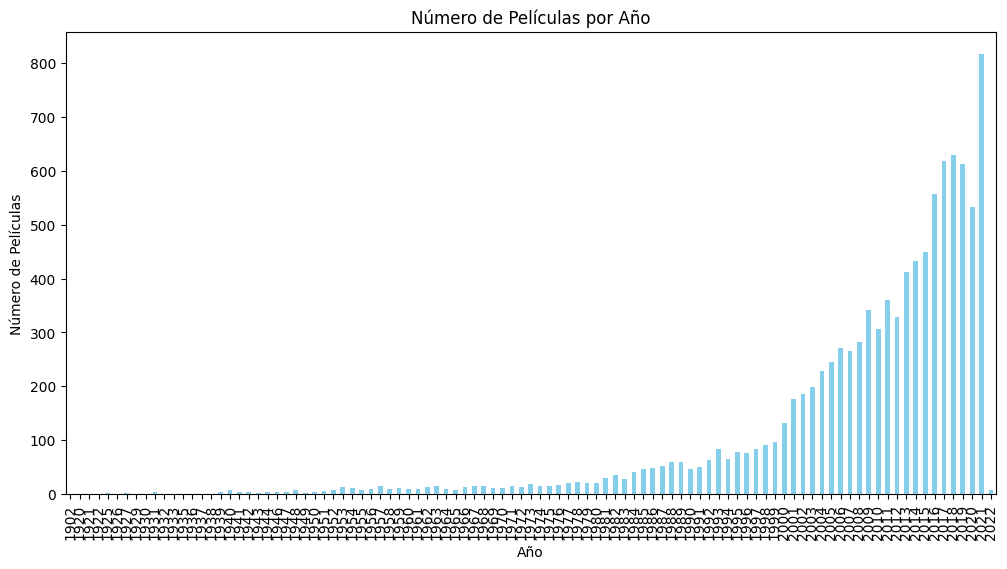

In [501]:
import matplotlib.pyplot as plt

# Convertir la columna 'releaseDate' a tipo datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Extraer el año de la fecha de lanzamiento y convertirlo a tipo entero
df['releaseYear'] = df['releaseDate'].dt.year.astype('Int64')

# Contar el número de películas por año
num_peliculas_por_año = df['releaseYear'].value_counts().sort_index()

# Encontrar el año con más películas
año_mas_pelis = num_peliculas_por_año.idxmax()
max_pelis = num_peliculas_por_año.max()

# Imprimir el resultado
print(f"En el año {año_mas_pelis} se hicieron más películas ({max_pelis} películas)")

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
num_peliculas_por_año.plot(kind='bar', color='skyblue')
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.show()



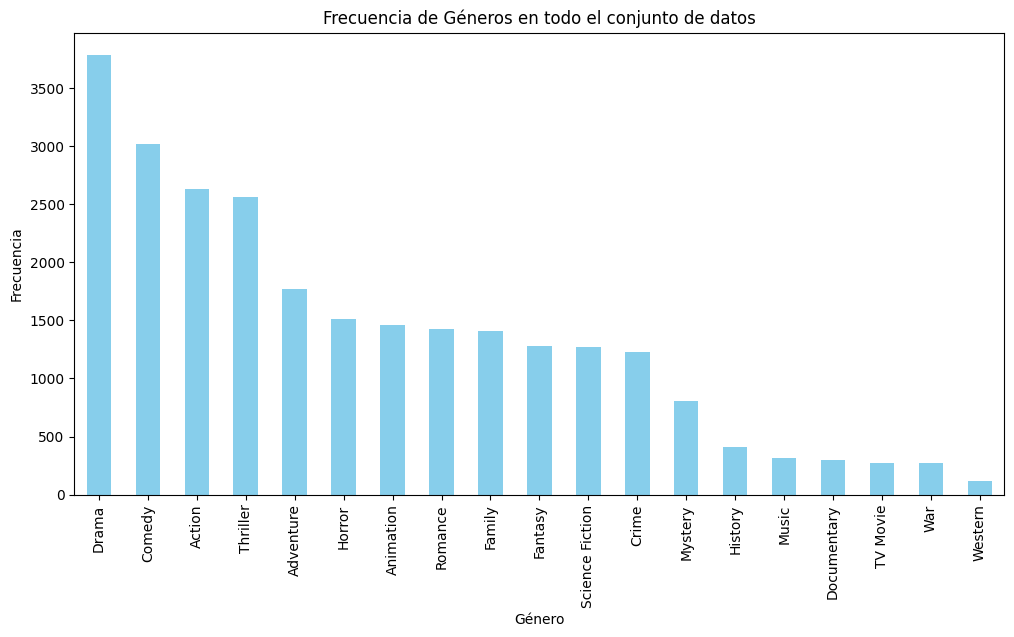

In [502]:
# Convertir la columna 'releaseDate' a tipo datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Ordenar el DataFrame por la columna 'releaseDate' para obtener las 20 películas más recientes
df_recientes = df.sort_values(by='releaseDate', ascending=False).head(20)

# Aplanar las listas en la columna 'genres' para las 20 películas más recientes
df_genres_expanded_recientes = df_recientes['genres'].explode().dropna()

# Aplanar las listas en la columna 'genres' para todo el conjunto de datos
df_genres_expanded = df['genres'].explode().dropna()

# Contar la frecuencia de cada género para las 20 películas más recientes y para todo el conjunto de datos
frecuencias_recientes = df_genres_expanded_recientes.value_counts()
frecuencias_total = df_genres_expanded.value_counts()

# Encontrar el género principal en ambos casos
genero_principal_recientes = frecuencias_recientes.idxmax()
genero_principal_total = frecuencias_total.idxmax()

# Representar los resultados con un gráfico
plt.figure(figsize=(12, 6))
frecuencias_total.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Géneros en todo el conjunto de datos')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()
